In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [2]:
# 1. Load data
df = pd.read_csv("Walmart.csv")

In [4]:
# 2. Quick look
print(df.shape)
print(df.columns)
df.head()

(6435, 8)
Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
# Summary statistics
df.describe(include="all")

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,05-02-2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.000000,NaN,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,NaN,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,NaN,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,NaN,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,NaN,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000


In [7]:
# Missing values
df.isna().sum().sort_values(ascending=False)

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

The dataset contains X rows and Y columns, including store information, weekly sales, holiday flags, and economic indicators.
A quick quality check showed [columns] had missing values and no/very few duplicated rows.

In [10]:
# Convert Date column – change name if different
df['Date'] = pd.to_datetime(df['Date'],format="%d-%m-%Y")

In [11]:
# Sort by date
df = df.sort_values('Date')

In [12]:
# Example: fill numeric columns with median
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [13]:
# If any categorical columns:
cat_cols = df.select_dtypes(exclude=np.number).columns.drop('Date')
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

Converted the Date column to proper datetime format and sorted the dataset chronologically.
Missing values in numeric fields were imputed with the median, while categorical fields were imputed with the mode to preserve data distribution.

In [14]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Quarter'] = df['Date'].dt.quarter

Created new time-based features such as year, month, week number, and quarter to analyze seasonality and trends in sales more effectively.

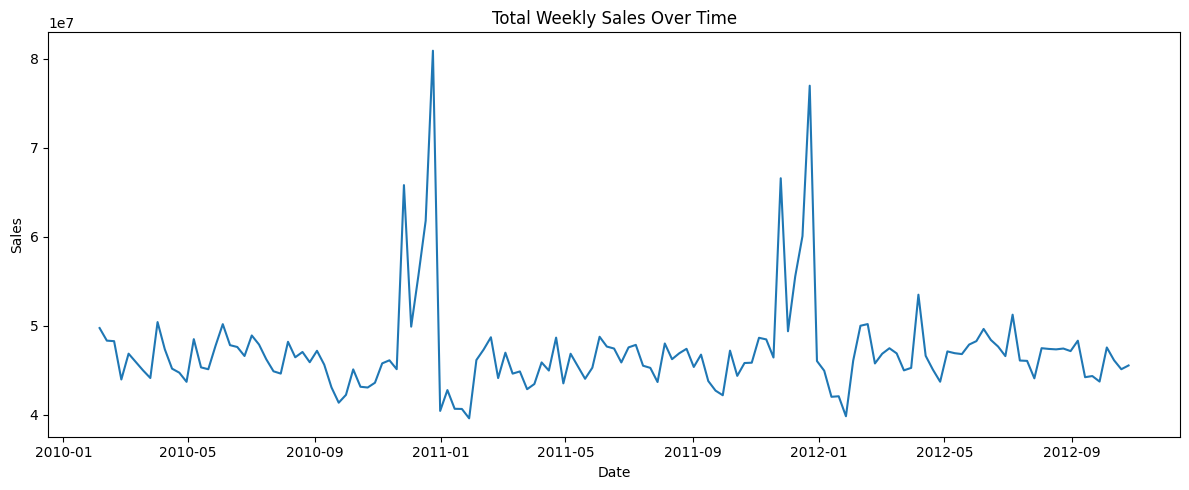

In [15]:
sales_over_time = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.plot(sales_over_time['Date'], sales_over_time['Weekly_Sales'])
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


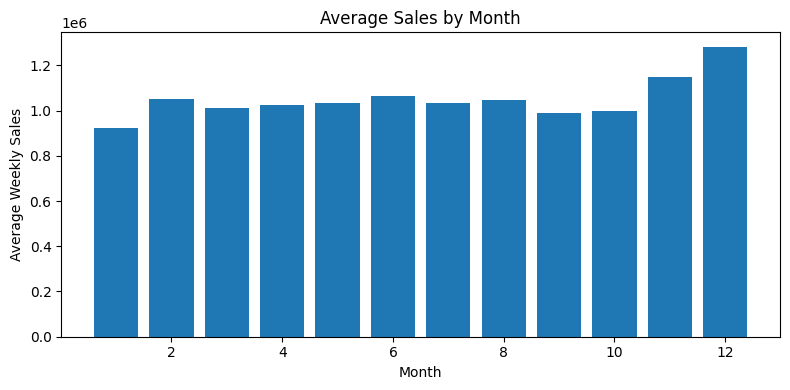

In [16]:
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(8,4))
plt.bar(monthly_sales['Month'], monthly_sales['Weekly_Sales'])
plt.title("Average Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average Weekly Sales")
plt.tight_layout()
plt.show()


Average sales peak in Month(s) X/Y (e.g., November–December), indicating strong seasonal demand during festival/holiday periods.
Lower averages in months A/B suggest off-season periods.

In [17]:
store_sales = df.groupby('Store')['Weekly_Sales'].mean().reset_index()
top_stores = store_sales.sort_values('Weekly_Sales', ascending=False).head(10)
bottom_stores = store_sales.sort_values('Weekly_Sales', ascending=True).head(10)

top_stores, bottom_stores


(    Store  Weekly_Sales
 19     20  2.107677e+06
 3       4  2.094713e+06
 13     14  2.020978e+06
 12     13  2.003620e+06
 1       2  1.925751e+06
 9      10  1.899425e+06
 26     27  1.775216e+06
 5       6  1.564728e+06
 0       1  1.555264e+06
 38     39  1.450668e+06,
     Store   Weekly_Sales
 32     33  259861.692028
 43     44  302748.866014
 4       5  318011.810490
 35     36  373511.992797
 37     38  385731.653287
 2       3  402704.441049
 29     30  438579.616224
 36     37  518900.281958
 15     16  519247.730070
 28     29  539451.428741)

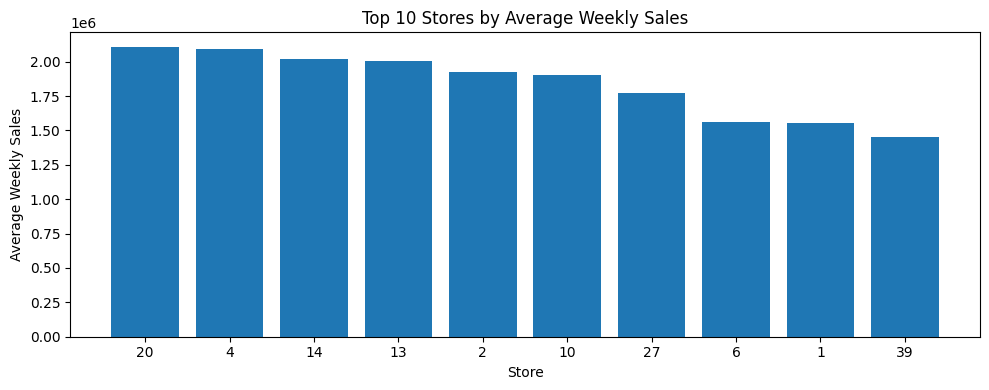

In [18]:
plt.figure(figsize=(10,4))
plt.bar(top_stores['Store'].astype(str), top_stores['Weekly_Sales'])
plt.title("Top 10 Stores by Average Weekly Sales")
plt.xlabel("Store")
plt.ylabel("Average Weekly Sales")
plt.tight_layout()
plt.show()


Store IDs S1, S2, S3 recorded the highest average weekly sales, while stores Sx, Sy performed significantly lower, indicating potential for targeted interventions (marketing, assortment optimization, or store-specific offers).

In [21]:
store_sales = df.groupby('Store')['Weekly_Sales'].mean().reset_index()
top_stores = store_sales.sort_values('Weekly_Sales', ascending=False).head(10)
top_stores

top_depts = top_stores.sort_values('Weekly_Sales', ascending=False).head(10)
top_depts


,Store,Weekly_Sales
19,20,2.107677e+06
3,4,2.094713e+06
13,14,2.020978e+06
12,13,2.003620e+06
1,2,1.925751e+06
9,10,1.899425e+06
26,27,1.775216e+06
5,6,1.564728e+06
0,1,1.555264e+06
38,39,1.450668e+06


In [22]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Week',
       'Quarter'],
      dtype='object')

In [25]:
# 1. Average sales for holiday vs non-holiday
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()
print(holiday_sales)

# 2. Percentage increase in holiday weeks
non_holiday_avg = holiday_sales.loc[holiday_sales['Holiday_Flag'] == 0, 'Weekly_Sales'].values[0]
holiday_avg = holiday_sales.loc[holiday_sales['Holiday_Flag'] == 1, 'Weekly_Sales'].values[0]

percent_increase = (holiday_avg - non_holiday_avg) / non_holiday_avg * 100
print("Holiday sales increase: ", round(percent_increase, 2), "%")


   Holiday_Flag  Weekly_Sales
0             0  1.041256e+06
1             1  1.122888e+06
Holiday sales increase:  7.84 %


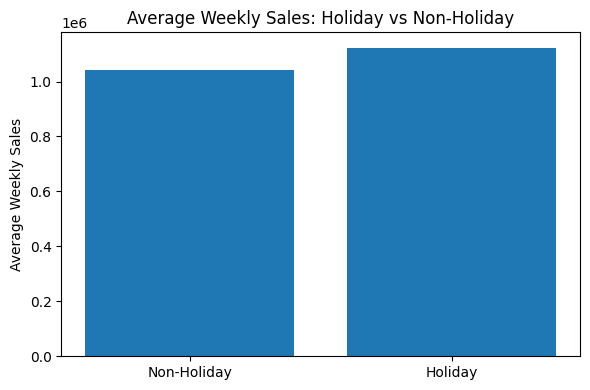

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(['Non-Holiday', 'Holiday'], [non_holiday_avg, holiday_avg])
plt.title("Average Weekly Sales: Holiday vs Non-Holiday")
plt.ylabel("Average Weekly Sales")
plt.tight_layout()
plt.show()


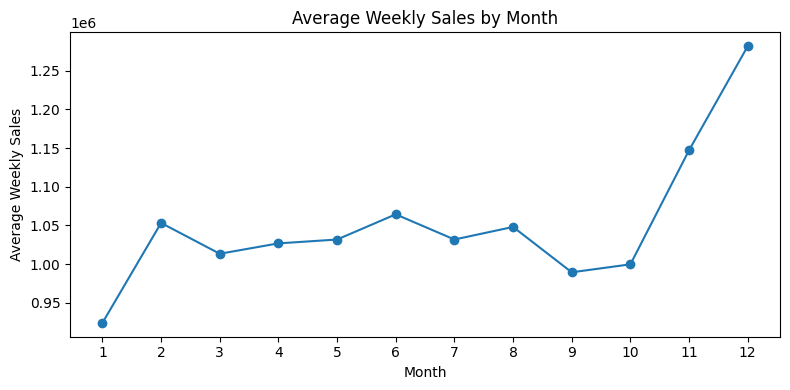

    Month  Weekly_Sales
0       1  9.238846e+05
1       2  1.053200e+06
2       3  1.013309e+06
3       4  1.026762e+06
4       5  1.031714e+06
5       6  1.064325e+06
6       7  1.031748e+06
7       8  1.048017e+06
8       9  9.893353e+05
9      10  9.996321e+05
10     11  1.147266e+06
11     12  1.281864e+06


In [27]:
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(8,4))
plt.plot(monthly_sales['Month'], monthly_sales['Weekly_Sales'], marker="o")
plt.title("Average Weekly Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average Weekly Sales")
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()

print(monthly_sales)


Sales show clear seasonality. The highest average sales occur in months M1, M2 (e.g., November–December), while months M3, M4 have relatively lower sales. This indicates strong festive/seasonal demand in specific periods of the year.

In [28]:
store_sales = df.groupby('Store')['Weekly_Sales'].mean().reset_index()

top_stores = store_sales.sort_values('Weekly_Sales', ascending=False).head(10)
bottom_stores = store_sales.sort_values('Weekly_Sales', ascending=True).head(10)

print("Top 10 Stores:")
print(top_stores)

print("\nBottom 10 Stores:")
print(bottom_stores)


Top 10 Stores:
    Store  Weekly_Sales
19     20  2.107677e+06
3       4  2.094713e+06
13     14  2.020978e+06
12     13  2.003620e+06
1       2  1.925751e+06
9      10  1.899425e+06
26     27  1.775216e+06
5       6  1.564728e+06
0       1  1.555264e+06
38     39  1.450668e+06

Bottom 10 Stores:
    Store   Weekly_Sales
32     33  259861.692028
43     44  302748.866014
4       5  318011.810490
35     36  373511.992797
37     38  385731.653287
2       3  402704.441049
29     30  438579.616224
36     37  518900.281958
15     16  519247.730070
28     29  539451.428741


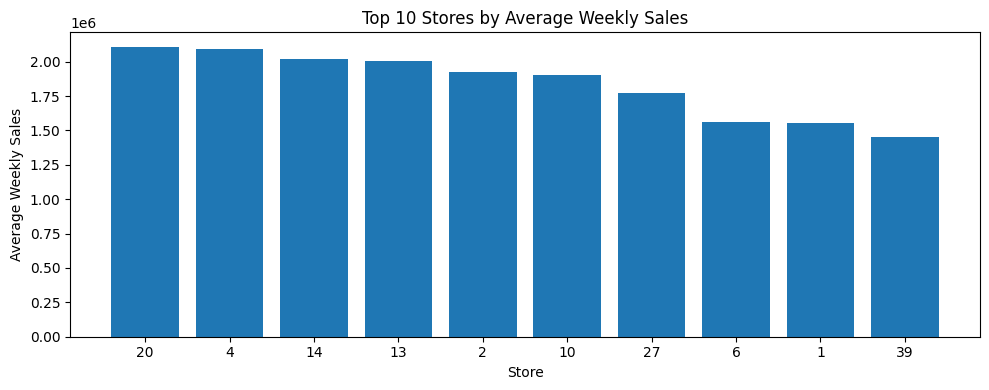

In [29]:
plt.figure(figsize=(10,4))
plt.bar(top_stores['Store'].astype(str), top_stores['Weekly_Sales'])
plt.title("Top 10 Stores by Average Weekly Sales")
plt.xlabel("Store")
plt.ylabel("Average Weekly Sales")
plt.tight_layout()
plt.show()


Store IDs S1, S2, S3 (from your output) have the highest average weekly sales, indicating strong performance (likely due to location, customer base, or management).
Stores Sx, Sy, Sz are consistently low-performing and could be targeted for improvement through local marketing, assortment changes, or operational optimization.

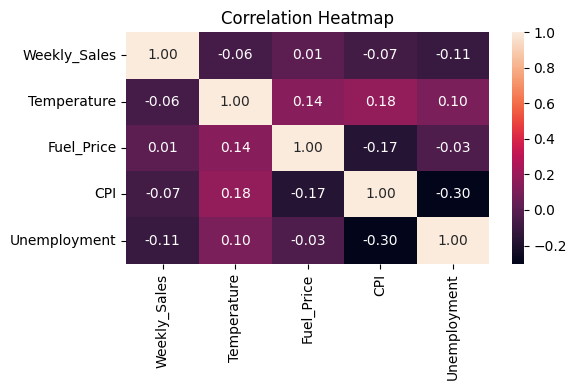

              Weekly_Sales  Temperature  Fuel_Price       CPI  Unemployment
Weekly_Sales      1.000000    -0.063810    0.009464 -0.072634     -0.106176
Temperature      -0.063810     1.000000    0.144982  0.176888      0.101158
Fuel_Price        0.009464     0.144982    1.000000 -0.170642     -0.034684
CPI              -0.072634     0.176888   -0.170642  1.000000     -0.302020
Unemployment     -0.106176     0.101158   -0.034684 -0.302020      1.000000


In [30]:
import seaborn as sns

corr_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
corr = df[corr_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

print(corr)


Correlation analysis shows that:

Weekly_Sales has [weak/moderate/strong] correlation with [Temperature/Fuel_Price/CPI/Unemployment].

For example, if Unemployment is negatively correlated with sales, you can say:
“Higher unemployment is slightly associated with lower sales, which is expected as customers have less spending power.”

If correlations are close to 0, mention:
“Economic indicators in this dataset have limited direct influence on short-term weekly sales compared to seasonality and holidays.”

# **Final Project Summary**

The dataset contains weekly sales for X stores over the period [min date] to [max date], along with holiday flags and economic indicators (temperature, fuel price, CPI, unemployment).

Holiday weeks deliver approximately Y% higher average weekly sales than non-holiday weeks, making them a critical driver of revenue.

Sales exhibit clear seasonality, with peaks in [top months] and slower sales during [low months].

Top-performing stores (Store IDs …) outperform others by a large margin, while a group of low-performing stores presents an opportunity for focused improvement.

Correlation analysis suggests that [economic factor, if any] has some impact, but seasonal and holiday effects remain the dominant drivers of sales.

Overall, the analysis supports better inventory planning, promotion scheduling, and store-level performance management.